The purpose of this excercise is to become familair with plotting RNA sequencing samples and generating a Matplotlib histogram with them.

In [2]:
import numpy as np
import csv

data = []
first_line = True

with open('E-MTAB-5214-query-results.tpms.tsv') as fid:
    csvfile = csv.reader(fid, delimiter= '\t')
    for line in csvfile:
        if first_line:
            names = line
            first_line = False
        else:
            data.append(line)
data = np.array(data)

In [3]:
names

['Gene ID',
 'Gene Name',
 'Brodmann (1909) area 24',
 'Brodmann (1909) area 9',
 'C1 segment of cervical spinal cord',
 'EBV-transformed lymphocyte',
 'adrenal gland',
 'amygdala',
 'aorta',
 'atrium auricular region',
 'blood',
 'breast',
 'caudate nucleus',
 'cerebellar hemisphere',
 'cerebellum',
 'cerebral cortex',
 'coronary artery',
 'cortex of kidney',
 'ectocervix',
 'endocervix',
 'esophagogastric junction',
 'esophagus mucosa',
 'esophagus muscularis mucosa',
 'fallopian tube',
 'greater omentum',
 'heart left ventricle',
 'hippocampus proper',
 'hypothalamus',
 'liver',
 'lower leg skin',
 'lung',
 'minor salivary gland',
 'nucleus accumbens',
 'ovary',
 'pancreas',
 'pituitary gland',
 'prostate gland',
 'putamen',
 'sigmoid colon',
 'skeletal muscle tissue',
 "small intestine Peyer's patch",
 'spleen',
 'stomach',
 'subcutaneous adipose tissue',
 'substantia nigra',
 'suprapubic skin',
 'testis',
 'thyroid gland',
 'tibial artery',
 'tibial nerve',
 'transformed skin fibr

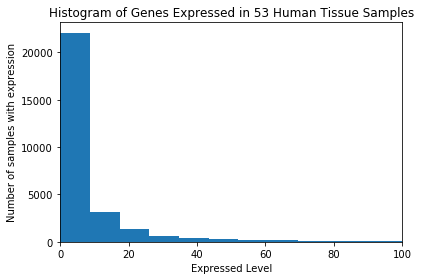

In [4]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


num_bins = 10000

fig, ax = plt.subplots()
ax.set_xlim (0,100) 

# the histogram of the data
n, bins, patches = ax.hist([float(x) for x in data[:,2] if x], num_bins)

ax.set_ylabel('Number of samples with expression')
ax.set_xlabel('Expressed Level')
ax.set_title('Histogram of Genes Expressed in 53 Human Tissue Samples')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()



The graph above is similar to the graph shown on the Expression Atlas website. However, we reduced the number of bins because our original graph was too condensed in one area. 

In [5]:
data [0]

array(['ENSG00000000003', 'TSPAN6', '6.0', '5.0', '7.0', '0.3', '17.0',
       '7.0', '11.0', '5.0', '0.2', '36.0', '7.0', '2.0', '3.0', '5.0',
       '11.0', '15.0', '39.0', '47.0', '10.0', '37.0', '8.0', '30.0',
       '28.0', '2.0', '6.0', '9.0', '24.0', '11.0', '14.0', '32.0', '7.0',
       '81.0', '9.0', '51.0', '22.0', '4.0', '11.0', '2.0', '18.0', '10.0',
       '13.0', '33.0', '6.0', '10.0', '70.0', '22.0', '9.0', '35.0',
       '20.0', '38.0', '16.0', '33.0', '31.0'], 
      dtype='|S25')

In [6]:
data[:,2]

array(['6.0', '0.2', '26.0', ..., '1.0', '0.1', '0.8'], 
      dtype='|S25')

In [7]:
np.max ([float(x) for x in data[:,2] if x])

86609.0

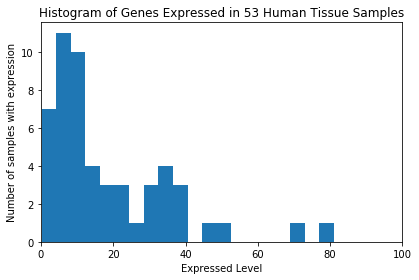

In [8]:
num_bins = 20

fig, ax = plt.subplots()
ax.set_xlim (0,100) 

# the histogram of the data
n, bins, patches = ax.hist([float(x) for x in data[0][2:] if x], num_bins)

ax.set_ylabel('Number of samples with expression')
ax.set_xlabel('Expressed Level')
ax.set_title('Histogram of Genes Expressed in 53 Human Tissue Samples')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [9]:
np.max ([float(x) for x in data[0][2:] if x])

81.0

Attemping a PCA with the same data

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X = []

for line in data[:,2:]:
    row = []
    for x in line:
        if x and  x!= '0.2s':
            row.append(float(x))
        else:
            row.append(0.0)
    X.append(row)

X = np.array(X)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
L = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)



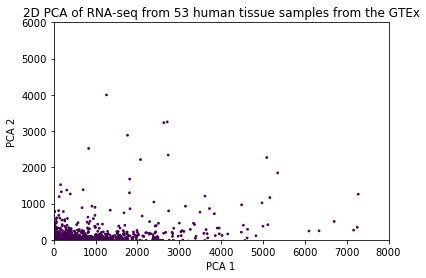

In [11]:
fig.tight_layout()
plt.scatter(X_r[:,0], X_r[:,1], 3, L)
plt.axis((0, 8000, 0, 6000))
plt.title("2D PCA of RNA-seq from 53 human tissue samples from the GTEx")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Scatter plot of the first two principal components of the data with 4 Kmeans clusters of varying colors

In [12]:
newarray=[]
for row in X_r:
    if row[0]<10000 and row[1]<10000:
        newarray.append(row)

In [13]:
len(newarray)

46682

In [14]:
len(X_r)

46711

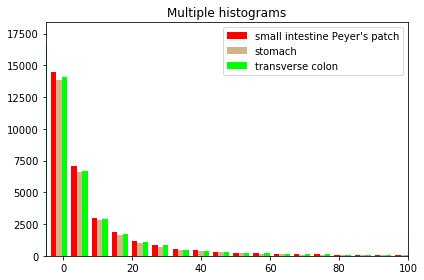

In [16]:
columns = [40,42,51]
sub = np.zeros((data.shape[0], 3))
for i in range(3):
    col = []
    for x in data[:, columns[i]]:
        if x:
            col.append(float(x))
        else:
            col.append(-10.0)
    sub[:,i] = col

num_bins = 10000
colors = ['red', 'tan', 'lime']
labels = [names[columns[i]] for i in range(3)]
fig, ax = plt.subplots()
ax.set_xlim (-5,100)
ax.hist(sub, num_bins, histtype='bar', stacked=False, color=colors, label=labels)
ax.set_title('Multiple histograms')
ax.legend(prop={'size': 10})

fig.tight_layout()
plt.show()


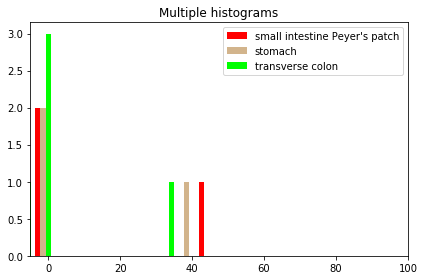

In [19]:
columns = [40,42,51]
n = data.shape[0]
perm = np.random.permutation(n)
subset = data[perm[:5],:]

sub = np.zeros((5, 3))
for i in range(3):
    col = []
    for x in subset[:, columns[i]]:
        if x:
            col.append(float(x))
        else:
            col.append(-10.0)
    sub[:,i] = col

num_bins = 10
colors = ['red', 'tan', 'lime']
labels = [names[columns[i]] for i in range(3)]
fig, ax = plt.subplots()
ax.set_xlim (-5,100)
ax.hist(sub, num_bins, histtype='bar', stacked=False, color=colors, label=labels)
ax.set_title('Multiple histograms')
ax.legend(prop={'size': 10})

fig.tight_layout()
plt.show()

In [20]:
print(perm[:5])

IndexError: too many indices for array